In [38]:
import numpy as np
six_parameter_fit_dict_optimized = {'H2O2 + OH <=> H2O + HO2': {'A': 9.84430377880828e-06,
  'n': 5.609576943394252,
  'Ea': -5067.335817762874,
  'c': 106968666.59843442,
  'd': 0.0005205151952906593,
  'f': -1.5259723576572012e-12},
 '2 HO2 <=> H2O2 + O2': {'A': 7969334613.514226,
  'n': 0.07208221725794761,
  'Ea': -2684.0683073495875,
  'c': 76896467.59387855,
  'd': -0.0012408299947228784,
  'f': 1.1179668099171449e-11},
 'HO2 + OH <=> H2O + O2': {'A': 3.4461768277969646e+20,
  'n': -2.789485474779295,
  'Ea': 281.604706052552,
  'c': 2590924.26353905,
  'd': -0.0012938009672917108,
  'f': 7.958849130380165e-12},
 '2 OH <=> H2O + O': {'A': 1309570.4273732263,
  'n': 1.7235694453394574,
  'Ea': -2286.820785017566,
  'c': 48741655.05409055,
  'd': -0.0003853523063602808,
  'f': 3.137888955629416e-12},
 'CH3 + HO2 <=> CH4 + O2': {'A': 3304.848332869559,
  'n': 2.6610323838872154,
  'Ea': -3976.281474851564,
  'c': 0.0,
  'd': 0.0,
  'f': 0.0},
 'CH3 + HO2 <=> CH3O + OH': {'A': 888854654183.595,
  'n': 0.26861934887250977,
  'Ea': -779.2660355821752,
  'c': 0.0,
  'd': 0.0,
  'f': 0.0}}

In [39]:
def calculate_six_parameter_fit(reaction,dictonary,temperature):
    #finish editing this 
    #calc Ea,c,d,F seprately 
    A = dictonary[reaction]['A']
    n = dictonary[reaction]['n']
    Ea_temp = dictonary[reaction]['Ea']/(1.987*temperature)
    c_temp = dictonary[reaction]['c']/((1.987*temperature)**3)
    d_temp = dictonary[reaction]['d']*(1.987*temperature)
    f_temp = dictonary[reaction]['f']* ((1.987*temperature)**3)
            

    k = A*(temperature**n)*np.exp(-Ea_temp-c_temp-d_temp-f_temp)
    return k 
def loop_over_six_parameter_fit(T_min, T_max, reaction,dictonary):
    k_six_parameter_fit = []
    Temperature = []
    for temp in np.arange(T_min,T_max):
        Temperature.append(temp)
        k_six_parameter_fit.append(calculate_six_parameter_fit(reaction,dictonary,temp))
    return k_six_parameter_fit

In [40]:
import cantera as ct
gas = ct.Solution('FFCM1_custom_cheb_extra_zeros_new_updated.cti')
gas.n_reactions

288

In [41]:
def calculate_cantera_rc(T_min,T_max,reaction):
    reaction_number = gas.reaction_equations().index(reaction)
    k_chevy = []
    Temperature=[]
    for temp in np.arange(T_min,T_max):
        Temperature.append(temp)
        gas.TPX = temp,101325,{'Ar':1}
        k_chevy.append(gas.forward_rate_constants[reaction_number]*1000)
    return k_chevy,Temperature

In [42]:
import matplotlib.pyplot as plt
print(gas.reaction_equations()[282])
print(gas.reaction_equations()[283])
print(gas.reaction_equations()[284])
print(gas.reaction_equations()[285])
print(gas.reaction_equations()[286])
print(gas.reaction_equations()[287])

H2O2 + OH <=> H2O + HO2
2 HO2 <=> H2O2 + O2
HO2 + OH <=> H2O + O2
2 OH <=> H2O + O
CH3 + HO2 <=> CH4 + O2
CH3 + HO2 <=> CH3O + OH


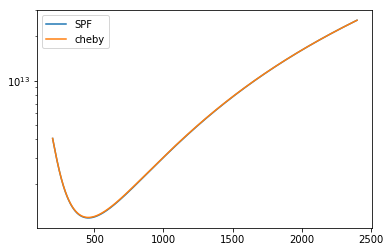

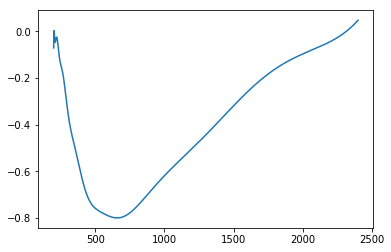

In [43]:
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'H2O2 + OH <=> H2O + HO2',six_parameter_fit_dict_optimized)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'H2O2 + OH <=> H2O + HO2')
plt.semilogy(Temperature,k_six_parameter_fit,label='SPF')
plt.semilogy(Temperature,k_chevy,label='cheby')
plt.legend()
percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

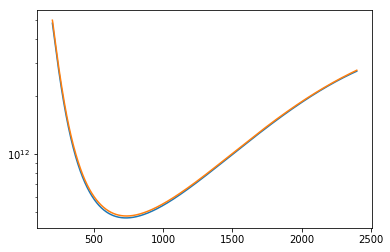

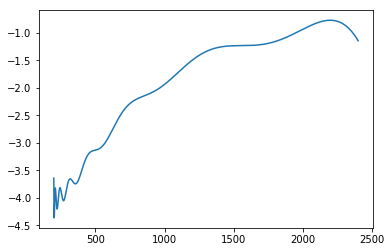

In [44]:
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'2 HO2 <=> H2O2 + O2',six_parameter_fit_dict_optimized)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'2 HO2 <=> H2O2 + O2')
plt.semilogy(Temperature,k_six_parameter_fit)
plt.semilogy(Temperature,k_chevy)


percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)


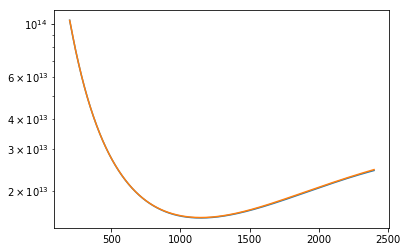

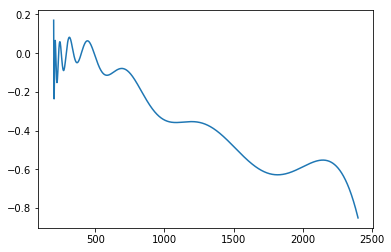

In [45]:
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'HO2 + OH <=> H2O + O2',six_parameter_fit_dict_optimized)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'HO2 + OH <=> H2O + O2')
plt.semilogy(Temperature,k_six_parameter_fit)
plt.semilogy(Temperature,k_chevy)

percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

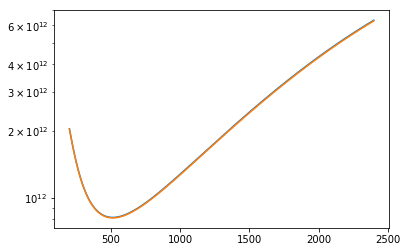

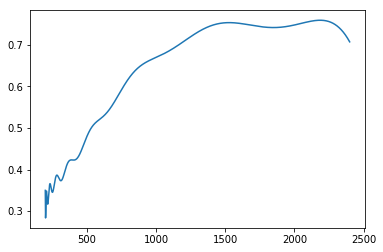

In [46]:
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'2 OH <=> H2O + O',six_parameter_fit_dict_optimized)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'2 OH <=> H2O + O')
plt.semilogy(Temperature,k_six_parameter_fit)
plt.semilogy(Temperature,k_chevy)

percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

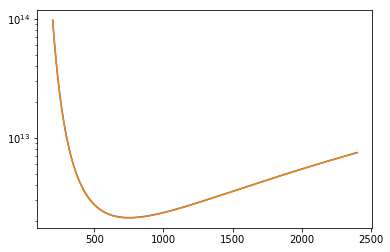

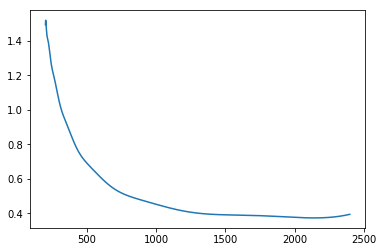

In [47]:
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'CH3 + HO2 <=> CH4 + O2',six_parameter_fit_dict_optimized)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'CH3 + HO2 <=> CH4 + O2')
plt.semilogy(Temperature,k_six_parameter_fit)
plt.semilogy(Temperature,k_chevy)

percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

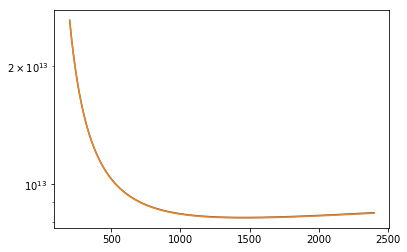

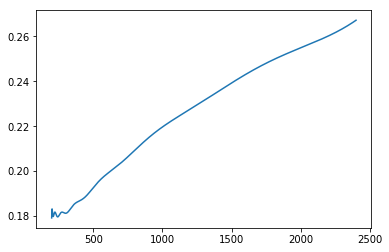

In [48]:
k_six_parameter_fit = loop_over_six_parameter_fit(200,2400,'CH3 + HO2 <=> CH3O + OH',six_parameter_fit_dict_optimized)
k_chevy,Temperature = calculate_cantera_rc(200,2400,'CH3 + HO2 <=> CH3O + OH')
plt.semilogy(Temperature,k_six_parameter_fit)
plt.semilogy(Temperature,k_chevy)


percent_difference= ((np.array(k_six_parameter_fit)-np.array(k_chevy))/(np.array(k_six_parameter_fit)))*100
plt.figure()
plt.plot(Temperature,percent_difference)

In [115]:
gas.n_reactions-6
282*3

846

In [116]:
gas.n_reactions

288

In [117]:
import pandas as pd
S_chevy = pd.read_csv('S_chevy.csv')
S_spf = pd.read_csv('S_spf.csv')
difference = S_spf-S_chevy
percent_difference = (difference/S_spf)*1000

In [118]:
print(percent_difference['0'].max())
print(percent_difference['0'].idxmax())
print(percent_difference['0'].mean(),'This is the Mean')
percent_difference.nlargest(25, '0')

19725.845490584594
115
-108.61317331668965 This is the Mean


,0,1,2,3,4,5,6,7,8,9,...,931,932,933,934,935,936,937,938,939,940
115,19725.845491,NaN,-23.061522,13.730875,14.386021,18.545066,-14.889430,-14.727780,NaN,-443.342951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,18599.454470,NaN,-16.685017,17.918516,18.583141,49.731190,-9.442075,-9.522683,NaN,-84.440214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2352,17173.657093,NaN,-23.122793,31.734670,30.753505,4.958077,99.596569,-1.985437,NaN,-106.734576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2351,8493.029529,NaN,-23.121553,31.708237,30.726711,4.906495,100.308331,-2.005213,NaN,-106.861591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,5848.453122,NaN,-23.192446,13.619541,14.274505,17.616276,-15.087825,-14.922305,NaN,-417.180530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2350,5620.244419,NaN,-23.121987,31.683654,30.701766,4.855697,101.038856,-2.009748,NaN,-106.981798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,5149.942372,NaN,-29.700436,-45.459181,-44.837527,-60.702912,31.119209,31.818548,NaN,-20.326103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,4627.378762,NaN,-16.347842,18.110091,18.775354,50.621442,-9.284416,-9.387846,NaN,-79.422142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2349,4170.830485,NaN,-23.122442,31.659518,30.677264,4.805564,101.770717,-2.012997,NaN,-107.101797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,3352.001026,NaN,-23.266391,13.527634,14.182392,16.732215,-15.438313,-15.268334,NaN,-394.007519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
S_chevy_original = pd.read_csv('S_chevy_original.csv')
S_spf_original = pd.read_csv('S_spf_original.csv')
difference_original = S_spf_original-S_chevy_original
percent_difference_original = (difference_original/S_spf_original)*1000

In [120]:
percent_difference_original['0'].idxmax()
print(percent_difference_original['0'].max())
print(percent_difference_original['0'].mean(),'This is the Mean')
percent_difference_original.nlargest(25, '0')

12021.15349975107
1.3306673655214185 This is the Mean


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,931,932,933,934,935,936,937,938,939,940
2177,0.0,12021.153500,NaN,13.141112,29.672248,29.665476,-3.828359,46.889909,41.238673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,0.0,2665.727518,NaN,13.100223,29.644622,29.637831,-3.691383,46.804681,41.211523,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,0.0,1503.178314,NaN,13.048474,29.649732,29.642950,-3.502704,46.817867,41.281907,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2180,0.0,1052.696774,NaN,13.005241,29.623822,29.617025,-3.358309,46.744436,41.263285,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2181,0.0,810.921889,NaN,12.965081,29.589205,29.582385,-3.228629,46.645979,41.218649,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2182,0.0,659.929666,NaN,12.925129,29.554952,29.548109,-3.099684,46.549023,41.174696,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,0.0,556.671037,NaN,12.885383,29.521057,29.514192,-2.971467,46.453535,41.131412,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184,0.0,481.600292,NaN,12.845842,29.487514,29.480627,-2.843972,46.359481,41.088780,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,0.0,424.561408,NaN,12.806503,29.454319,29.447410,-2.717193,46.266829,41.046786,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,0.0,415.457601,NaN,3.476983,3.171828,3.232695,-13.377556,32.347360,32.302716,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
S_chevy_ksens = pd.read_csv('S_ksens_chevy.csv')
S_spf_ksens = pd.read_csv('S_ksens_spf.csv')
difference_ksens = S_spf_ksens-S_chevy_ksens
percent_difference_ksens = (difference_ksens/S_spf_ksens)*1000

In [122]:
print(percent_difference_ksens['282'].max())
print(percent_difference_ksens['282'].mean(),'This is the Mean')
percent_difference_ksens.nlargest(25, '282')

5903.459788643706
-58.90310089071218 This is the Mean


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
839,-4.337066,NaN,7.126605,14.190054,14.249076,-6.737738,-2028.831990,14.473175,NaN,24.708095,...,NaN,NaN,650.784362,NaN,5903.459789,-43.945644,-18.828916,-17.458529,NaN,NaN
840,-4.397134,NaN,7.150800,14.227749,14.287314,-6.728471,-1763.506125,14.857889,NaN,25.512640,...,NaN,NaN,639.386732,NaN,2916.930199,-44.068263,-18.931016,-17.310307,NaN,NaN
841,-4.317828,NaN,7.175078,14.311536,14.371862,-6.751888,-1566.270228,15.263882,NaN,25.831063,...,NaN,NaN,628.778736,NaN,1939.677885,-44.076807,-18.966341,-17.110405,NaN,NaN
842,-4.269704,NaN,7.199243,14.384455,14.445427,-6.767775,-1406.449226,15.634493,NaN,26.170587,...,NaN,NaN,618.231724,NaN,1453.592501,-44.110547,-19.016576,-16.921975,NaN,NaN
843,-4.339955,NaN,7.223198,14.418574,14.479935,-6.756213,-1267.379850,15.948549,NaN,26.809561,...,NaN,NaN,607.028790,NaN,1163.163922,-44.241501,-19.123660,-16.776438,NaN,NaN
2479,-4.280953,NaN,7.254617,14.668182,14.729149,-6.327264,595.462943,20.788101,NaN,178.937374,...,NaN,NaN,1873.899669,NaN,1127.771170,-42.499864,-18.833645,-16.686835,NaN,NaN
844,-4.411037,NaN,7.247087,14.452430,14.514174,-6.744674,-1145.126014,16.258247,NaN,27.452192,...,NaN,NaN,595.137388,NaN,969.408651,-44.374368,-19.231918,-16.631770,NaN,NaN
532,0.481133,NaN,-2.362117,-3.166125,-3.120534,-8.728943,1098.142130,-95.776603,NaN,172.312711,...,NaN,NaN,329.627187,NaN,845.493725,-29.431722,-4.089891,-60.207473,NaN,NaN
845,-4.482965,NaN,7.270908,14.486026,14.548148,-6.733156,-1036.811721,16.563677,NaN,28.098509,...,NaN,NaN,582.492040,NaN,830.945248,-44.509192,-19.341369,-16.487963,NaN,NaN
846,-4.555753,NaN,7.294662,14.519366,14.581860,-6.721661,-940.181453,16.864927,NaN,28.748546,...,NaN,NaN,569.018696,NaN,727.061152,-44.646014,-19.452033,-16.345009,NaN,NaN


In [123]:
print(percent_difference_ksens['283'].max())
print(percent_difference_ksens['283'].mean(),'This is the Mean')
percent_difference_ksens.nlargest(25, '283')

27098.713717153118
-16.85755064837542 This is the Mean


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
1059,-11.845473,NaN,8.572329,20.056829,20.106059,-9.657843,1576.854497,774.943687,NaN,24.970148,...,NaN,NaN,2362.006723,NaN,21.066595,27098.713717,-56.127727,6.458794,NaN,NaN
1060,-11.890293,NaN,8.560385,20.070164,20.119270,-9.691804,2875.672661,635.623850,NaN,25.005337,...,NaN,NaN,2364.402436,NaN,20.914612,2076.734327,-56.536547,6.507190,NaN,NaN
4081,-52.820972,NaN,-1.779235,24.180929,24.181730,13.633622,59.003563,59.020929,NaN,184.362457,...,NaN,NaN,-21787.882395,NaN,183.682277,1619.646446,-40.611127,42.438123,NaN,NaN
1061,-11.850181,NaN,8.536980,20.079663,20.128631,-9.742359,30423.475581,543.059364,NaN,25.140430,...,NaN,NaN,2366.886239,NaN,20.728098,1061.092054,-56.808796,6.548135,NaN,NaN
478,0.664612,NaN,-3.619362,-4.820195,-4.731990,-8.703877,-78.742887,2.761647,NaN,-6.939270,...,NaN,NaN,1926.623949,NaN,-2.659626,798.333220,-3.116946,-168.092150,NaN,NaN
4082,-54.022296,NaN,-2.203854,21.886747,21.888597,13.705398,57.240876,57.253845,NaN,166.383223,...,NaN,NaN,-18403.863975,NaN,159.413467,714.986547,-39.889364,40.574016,NaN,NaN
1062,-11.908623,NaN,8.526250,20.093933,20.142782,-9.774746,-3139.342840,469.455930,NaN,25.142406,...,NaN,NaN,2369.467151,NaN,20.587597,709.874269,-57.238223,6.595526,NaN,NaN
1063,-11.967853,NaN,8.515530,20.108140,20.156870,-9.807179,-1453.900762,415.341000,NaN,25.144335,...,NaN,NaN,2372.057890,NaN,20.447690,527.654588,-57.677975,6.642716,NaN,NaN
1064,-12.027885,NaN,8.504819,20.122285,20.170897,-9.839658,-929.084643,373.879317,NaN,25.146219,...,NaN,NaN,2374.658511,NaN,20.308373,416.111038,-58.128430,6.689704,NaN,NaN
4134,-0.183887,1.628429,0.019991,-1.199126,-1.031417,0.101927,84.382734,2.435137,NaN,378.029139,...,961.819642,-3875.673747,4250.263214,NaN,0.768057,409.266979,10.112027,-0.654802,-0.958491,3.339557


In [124]:
print(percent_difference_ksens['284'].max())
print(percent_difference_ksens['284'].mean(),'This is the Mean')
percent_difference_ksens.nlargest(25, '284')

14304.634194459226
-9.181004470818845 This is the Mean


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
1688,8.301678,NaN,7.387330,17.912802,17.942819,-4.739170,79.411726,27.301714,NaN,61.707641,...,NaN,NaN,33553.244106,NaN,3.784698,-20.858468,14304.634194,6.098789,NaN,NaN
1178,-16.880816,NaN,6.304321,21.712277,21.750371,-16.079212,49.496339,68.587505,NaN,25.034214,...,NaN,NaN,2784.057688,NaN,8.329534,-26.632062,6752.507424,9.098726,NaN,NaN
1689,8.334608,NaN,7.402489,17.907684,17.947815,-4.748283,381.178388,31.908760,NaN,45.183587,...,NaN,NaN,1702.001969,NaN,3.778385,-20.926407,3892.223535,6.130291,NaN,NaN
1179,-16.942486,NaN,6.282723,21.727935,21.765961,-16.153184,49.543095,68.343858,NaN,25.021177,...,NaN,NaN,2787.941743,NaN,8.257969,-26.804306,2778.242990,9.102068,NaN,NaN
1690,8.367537,NaN,7.393302,17.803048,17.845721,-4.773083,531.005848,35.270599,NaN,12.836102,...,NaN,NaN,797.603021,NaN,3.772208,-20.989096,2253.937836,6.146138,NaN,NaN
1180,-17.005085,NaN,6.261117,21.743542,21.781500,-16.227427,49.588592,68.106628,NaN,25.008307,...,NaN,NaN,2791.842940,NaN,8.186473,-26.974733,1739.531616,9.105402,NaN,NaN
1691,8.399933,NaN,7.460025,18.033703,18.095266,-4.750396,562.316719,38.809213,NaN,43.918635,...,NaN,NaN,1214.733511,NaN,3.765785,-21.067682,1587.222024,6.210371,NaN,NaN
269,415.457601,NaN,3.476983,3.171828,3.232695,-13.377556,32.347360,32.302716,NaN,9.076022,...,NaN,NaN,-7129.016084,NaN,2.722480,-25.735135,1343.014412,2.391728,NaN,NaN
152,-34.300250,NaN,-8.663620,6.528080,6.499315,0.412330,15.871801,15.926545,NaN,8.460805,...,NaN,NaN,34.800850,NaN,-2.655388,-34.552006,1296.327131,-2.436911,NaN,NaN
1181,-16.956397,NaN,6.227740,21.758731,21.796615,-16.319974,49.860576,68.094075,NaN,25.034582,...,NaN,NaN,2795.707101,NaN,8.096029,-27.236952,1262.204016,9.091370,NaN,NaN


In [125]:
print(percent_difference_ksens['285'].max())
print(percent_difference_ksens['285'].mean(),'This is the Mean')
percent_difference_ksens.nlargest(25, '285')

3597.181677453285
-4.987760613444899 This is the Mean


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
466,0.675147,NaN,-3.604193,-4.982643,-4.897478,-8.556061,-215.219067,2.567704,NaN,-8.927425,...,NaN,NaN,1699.310730,NaN,-3.645901,24.252544,-2.919741,3597.181677,NaN,NaN
2453,0.621647,NaN,-3.635913,-4.908786,-4.895626,-8.314902,-316.692162,-10.191133,NaN,-1.459810,...,NaN,NaN,13606.847977,NaN,-3.679476,23.615635,-2.804222,1213.479926,NaN,NaN
430,1.071388,NaN,1.381637,-3.246116,-3.258869,-6.785517,-631.928756,-1.315192,NaN,-0.232404,...,NaN,NaN,2506.435223,NaN,-3.722799,6.927155,1.842236,1147.527348,NaN,NaN
465,0.675517,NaN,-3.590520,-4.991510,-4.906171,-8.538343,-223.432079,2.465839,NaN,-9.141533,...,NaN,NaN,1728.628842,NaN,-3.708928,21.614900,-2.898605,1103.760946,NaN,NaN
4074,-35.131078,NaN,35.385087,-105.311263,-105.471469,-26.516708,-754.304064,-738.525752,NaN,-86.100466,...,NaN,NaN,-2431.126605,NaN,-114.533279,-123.392547,-55.595556,1016.071592,NaN,NaN
3986,-14.369245,NaN,18.835645,-30.290837,-30.330900,-23.323029,-144.945164,-144.404770,NaN,-43.540405,...,NaN,NaN,927.979430,NaN,-52.760666,-65.942963,-29.202545,800.980437,NaN,NaN
464,0.676259,NaN,-3.573328,-4.998203,-4.912627,-8.519500,-228.060942,2.395798,NaN,-9.301114,...,NaN,NaN,1719.895484,NaN,-3.770951,19.378624,-2.876022,644.867046,NaN,NaN
463,0.676470,NaN,-3.554805,-5.003791,-4.918502,-8.499269,-239.910167,2.936191,NaN,-9.153822,...,NaN,NaN,1704.280479,NaN,-3.828777,17.447128,-2.851689,452.458379,NaN,NaN
3987,-15.105669,NaN,16.932390,-34.865009,-34.911595,-20.380484,-237.359295,-235.767002,NaN,-49.368067,...,NaN,NaN,931.213628,NaN,-55.783459,-67.407272,-29.602986,384.616621,NaN,NaN
462,0.676115,NaN,-3.534973,-5.008254,-4.924788,-8.477703,-263.011015,4.446460,NaN,-8.847667,...,NaN,NaN,1713.212911,NaN,-3.882340,15.765138,-2.825441,346.895481,NaN,NaN


In [126]:
print(percent_difference_ksens['286'].max())
print(percent_difference_ksens['286'].mean(),'This is the Mean')
percent_difference_ksens.nlargest(25, '286')

4.69622401760431
-1.005688397642382 This is the Mean


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
4387,-0.027923,-0.648011,-0.465748,-0.686162,-0.588688,-0.849317,-6.134840,-0.816326,NaN,8311.528589,...,1155.465688,-12417.464328,-88500.308672,NaN,-0.425953,-1.849136,8.490584,6.927526,4.696224,-0.391024
4385,-0.046308,-0.693514,-0.571810,-0.541218,-0.633256,-0.882684,0.589537,-1.086196,NaN,553.311000,...,1143.296301,637.565963,-47.200002,NaN,-0.435900,-1.841348,8.444358,5.445715,4.016123,-0.444546
4386,-0.046308,-0.693514,-0.571810,-0.541218,-0.633256,-0.882684,0.589537,-1.086196,NaN,553.311000,...,1143.296301,637.565963,-47.200002,NaN,-0.435900,-1.841348,8.444358,5.445715,4.016123,-0.444546
4384,-0.043637,-0.655535,-0.606780,-0.495729,-0.569409,-0.876174,2.366737,-1.047997,NaN,608.781990,...,1052.714528,-88.688401,2214.768471,NaN,-0.372838,-1.720699,8.515946,5.334572,3.571800,-0.443705
4383,-0.053604,-0.704890,-0.614491,-0.657296,-0.588128,-0.873989,0.516715,-0.881917,NaN,-716.378952,...,902.860942,-979.408405,4604.629752,NaN,-0.416433,-1.772159,8.372747,5.611437,3.439992,-0.443293
4382,-0.052477,-0.721951,-0.532143,-0.734523,-0.630515,-0.887893,-2.039666,-0.845482,NaN,-3218.780880,...,1991.897965,748.671390,795.924080,NaN,-0.468440,-1.882072,8.197602,5.851993,3.407674,-0.439907
4381,-0.033379,-0.631852,-0.573587,-0.657446,-0.563211,-0.878214,-3.016684,-0.810104,NaN,-903.756334,...,1465.108282,2925.712679,-1601.465355,NaN,-0.372392,-1.746625,8.399391,5.854200,2.976553,-0.429775
4380,-0.037945,-0.646947,-0.550343,-0.613158,-0.598989,-0.902010,-1.570462,-0.944597,NaN,10.897305,...,-277.598349,2366.087690,-2291.779201,NaN,-0.401673,-1.808238,8.256577,5.472242,2.811489,-0.450045
4379,-0.054092,-0.710626,-0.563248,-0.653280,-0.643797,-0.915981,0.024751,-1.003371,NaN,147.594655,...,723.460395,1345.216738,158.469445,NaN,-0.469162,-1.904031,8.054029,5.105304,2.770120,-0.475895
4267,-1.281181,0.073871,0.041642,-5.906350,-4.329290,-0.711727,-23.487140,-0.134962,NaN,2167.887399,...,1464.682190,-56235.356507,4423.338873,NaN,-0.029503,-1.315430,-62.515480,0.388127,2.398348,-1.262521


In [127]:
print(percent_difference_ksens['287'].max())
print(percent_difference_ksens['287'].mean(),'This is the Mean')
percent_difference_ksens.nlargest(25, '287')

196.83898147128332
0.14672112335048593 This is the Mean


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
4210,0.400060,-0.335850,-0.334792,-0.455301,-0.514165,-0.976410,2.584765,-0.821851,NaN,-3567.985363,...,1790.682184,319.364382,-464.916665,NaN,1.182585,-4.556086,10.103616,-0.111136,-2.281196,196.838981
4209,0.366872,-0.351116,-0.346099,-0.575293,-0.538667,-1.002141,-0.510619,-0.825938,NaN,418.790814,...,296.002523,-494.916264,10948.298731,NaN,1.289541,-4.400510,10.053174,-0.133062,-2.295815,46.325892
4208,0.350376,-0.362397,-0.362139,-0.589231,-0.568849,-0.974798,0.296289,-0.705929,NaN,-52.923482,...,57.793507,-857.894559,-827678.464681,NaN,1.345728,-4.211878,10.034577,-0.137770,-2.318746,28.781041
4207,0.327541,-0.369572,-0.378026,-0.659799,-0.628426,-0.967361,2.964633,-0.904615,NaN,-743.557277,...,-95.006045,-431.995514,8884.545061,NaN,1.469495,-4.063123,9.992793,-0.151410,-2.323108,19.568726
4206,0.322535,-0.378823,-0.384068,-0.651169,-0.615090,-0.979361,2.160980,-1.122770,NaN,-963.496299,...,980.924123,-1212.593025,3561.530740,NaN,1.538205,-4.013201,9.978903,-0.164320,-2.325790,16.578815
4205,0.293978,-0.397725,-0.395886,-0.586196,-0.605080,-0.998343,-1.203358,-1.007829,NaN,1606.733491,...,1384.571744,-383.746579,2109.169615,NaN,1.625346,-3.913035,9.947637,-0.186085,-2.315199,13.145881
4204,0.265895,-0.411329,-0.404808,-0.646542,-0.638404,-1.018531,-4.261058,-0.825173,NaN,1297.092633,...,5720.555817,-191.118843,1662.060994,NaN,1.732593,-3.846696,9.904097,-0.199176,-2.315182,11.157131
4203,0.247939,-0.433879,-0.425425,-0.719859,-0.738153,-0.998729,-3.150033,-0.929895,NaN,826.449477,...,148.553611,-359.436633,213.816489,NaN,1.900623,-3.755948,9.881899,-0.221712,-2.337232,8.905015
4202,0.211872,-0.453711,-0.443380,-0.722149,-0.741177,-1.006454,-2.391846,-0.975332,NaN,-693.543660,...,1340.098323,177.566763,-546.144024,NaN,2.118828,-3.626560,9.836747,-0.241794,-2.350911,7.069674
4200,0.201107,-0.463481,-0.457087,-0.761907,-0.768924,-0.995369,-4.456739,-1.092601,NaN,-742.174320,...,2718.834511,298.748076,-1861.131764,NaN,2.236239,-3.603520,9.804074,-0.261300,-2.351866,6.384204


In [128]:
print(percent_difference_ksens['0'].max())
print(percent_difference_ksens['0'].mean(),'This is the Mean')
percent_difference_ksens.nlargest(25, '0')

12021.15349975107
1.3309706169720843 This is the Mean


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
2177,12021.153500,NaN,13.141112,29.672248,29.665476,-3.828359,46.889909,41.238673,NaN,-24.721404,...,NaN,NaN,990.865925,NaN,-12.991134,-64.877705,-30.913386,12.261205,NaN,NaN
2178,2665.727518,NaN,13.100223,29.644622,29.637831,-3.691383,46.804681,41.211523,NaN,-24.972963,...,NaN,NaN,990.864103,NaN,-13.021743,-64.962084,-31.049247,12.236439,NaN,NaN
2179,1503.178314,NaN,13.048474,29.649732,29.642950,-3.502704,46.817867,41.281907,NaN,-25.288948,...,NaN,NaN,990.862461,NaN,-13.050572,-65.027751,-31.183418,12.204180,NaN,NaN
2180,1052.696774,NaN,13.005241,29.623822,29.617025,-3.358309,46.744436,41.263285,NaN,-25.550765,...,NaN,NaN,990.860498,NaN,-13.079485,-65.106515,-31.313924,12.177797,NaN,NaN
2181,810.921889,NaN,12.965081,29.589205,29.582385,-3.228629,46.645979,41.218649,NaN,-25.795816,...,NaN,NaN,990.858459,NaN,-13.108825,-65.190525,-31.445153,12.153497,NaN,NaN
2182,659.929666,NaN,12.925129,29.554952,29.548109,-3.099684,46.549023,41.174696,NaN,-26.041343,...,NaN,NaN,990.856410,NaN,-13.138249,-65.274988,-31.577103,12.129305,NaN,NaN
2183,556.671037,NaN,12.885383,29.521057,29.514192,-2.971467,46.453535,41.131412,NaN,-26.287347,...,NaN,NaN,990.854350,NaN,-13.167758,-65.359907,-31.709779,12.105221,NaN,NaN
2184,481.600292,NaN,12.845842,29.487514,29.480627,-2.843972,46.359481,41.088780,NaN,-26.533830,...,NaN,NaN,990.852279,NaN,-13.197352,-65.445288,-31.843187,12.081244,NaN,NaN
2185,424.561408,NaN,12.806503,29.454319,29.447410,-2.717193,46.266829,41.046786,NaN,-26.780791,...,NaN,NaN,990.850198,NaN,-13.227031,-65.531133,-31.977333,12.057374,NaN,NaN
269,415.457601,NaN,3.476983,3.171828,3.232695,-13.377556,32.347360,32.302716,NaN,9.076022,...,NaN,NaN,-7129.016084,NaN,2.722480,-25.735135,1343.014412,2.391728,NaN,NaN
